In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv("gurgaon_properties_post_feature_selection.csv")

In [3]:
df.head()

,property_type,sector,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_score,luxury_category,floor_category,price
0,0.0,36.0,3.0,2.0,2.0,2.0,1.0,850.0,0.0,0.0,0.0,8.0,1.0,1.0,0.82
1,0.0,95.0,2.0,2.0,2.0,4.0,1.0,1226.0,1.0,0.0,0.0,38.0,1.0,2.0,0.95
2,0.0,103.0,2.0,2.0,1.0,17.0,1.0,1000.0,0.0,0.0,0.0,49.0,1.0,0.0,0.32
3,0.0,99.0,3.0,4.0,4.0,10.0,3.0,1615.0,1.0,0.0,1.0,174.0,0.0,2.0,1.60
4,0.0,5.0,2.0,2.0,1.0,5.0,3.0,582.0,0.0,1.0,0.0,159.0,0.0,2.0,0.48


In [4]:
X = df.drop(columns=['price','luxury_score','floorNum'])
y = df['price']

In [5]:
X.head()

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category
0,0.0,36.0,3.0,2.0,2.0,1.0,850.0,0.0,0.0,0.0,1.0,1.0
1,0.0,95.0,2.0,2.0,2.0,1.0,1226.0,1.0,0.0,0.0,1.0,2.0
2,0.0,103.0,2.0,2.0,1.0,1.0,1000.0,0.0,0.0,0.0,1.0,0.0
3,0.0,99.0,3.0,4.0,4.0,3.0,1615.0,1.0,0.0,1.0,0.0,2.0
4,0.0,5.0,2.0,2.0,1.0,3.0,582.0,0.0,1.0,0.0,0.0,2.0


In [6]:
from sklearn.model_selection import KFold,cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer 
from sklearn.svm import SVR

C:\Users\dhruv\AppData\Local\Temp\ipykernel_12036\1122818235.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df['price'])


<Axes: ylabel='Density'>

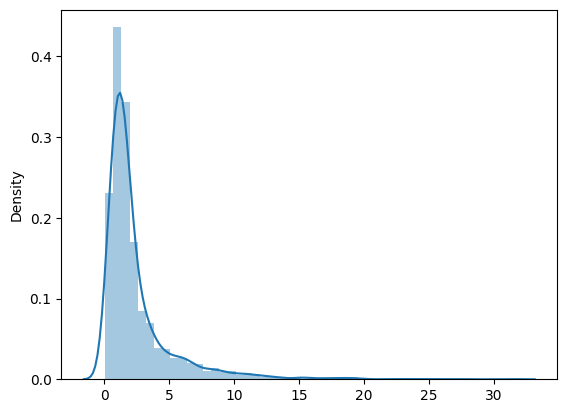

In [7]:
sns.distplot(x = df['price'])

C:\Users\dhruv\AppData\Local\Temp\ipykernel_12036\2772869454.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y)


<Axes: xlabel='price', ylabel='Density'>

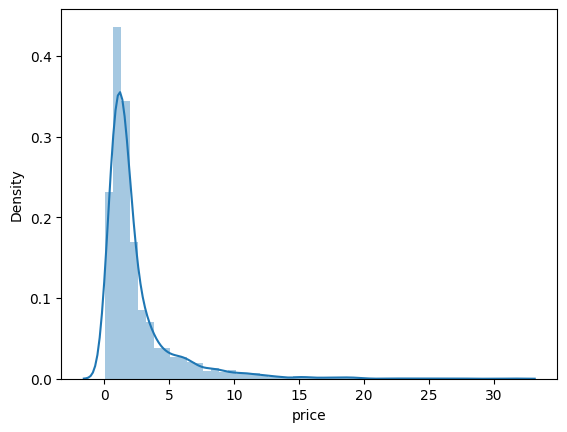

In [8]:
# since price plot is right skewed lets convert it to normal curve by applying log transformation
# log1p = log(1+x)
y_transformed = np.log1p(y)
sns.distplot(y)

C:\Users\dhruv\AppData\Local\Temp\ipykernel_12036\874449745.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = np.log(X['built_up_area']))


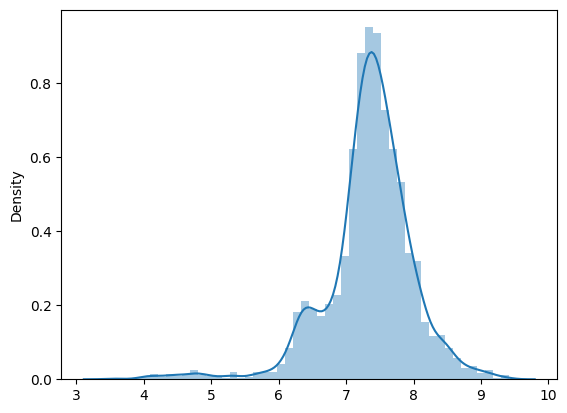

In [9]:
sns.distplot(x = np.log(X['built_up_area']))
X['built_up_area'] = np.log(X['built_up_area'])

In [10]:
X.head()

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category
0,0.0,36.0,3.0,2.0,2.0,1.0,6.745236,0.0,0.0,0.0,1.0,1.0
1,0.0,95.0,2.0,2.0,2.0,1.0,7.111512,1.0,0.0,0.0,1.0,2.0
2,0.0,103.0,2.0,2.0,1.0,1.0,6.907755,0.0,0.0,0.0,1.0,0.0
3,0.0,99.0,3.0,4.0,4.0,3.0,7.387090,1.0,0.0,1.0,0.0,2.0
4,0.0,5.0,2.0,2.0,1.0,3.0,6.366470,0.0,1.0,0.0,0.0,2.0


In [11]:
df['property_type'].value_counts()

property_type
0.0    2804
1.0     750
Name: count, dtype: int64

In [12]:
col_encode = ['property_type','sector', 'agePossession']
scaled_cols = ['bedRoom','bathroom','built_up_area','servant room','store room']

In [13]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), scaled_cols),
        ('cat',OneHotEncoder(drop='first'), col_encode)
    ], remainder='passthrough'
)

In [14]:
pipeline = Pipeline([
    ('preprocessor',preprocessor),
    ('regressor', LinearRegression())
])
pipeline = Pipeline([
    ('preprocessor',preprocessor),
    ('regressor', SVR())
])

In [15]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(pipeline, X, y_transformed, cv = kfold, scoring='r2')
scores.mean()

0.8888842070947549

In [16]:
scores.std()

0.015027166836702285

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.2, random_state=42)
pipeline.fit(X_train, y_train)

C:\Users\dhruv\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['bedRoom', 'bathroom',
                                                   'built_up_area',
                                                   'servant room',
                                                   'store room']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['property_type', 'sector',
                                                   'agePossession'])])),
                ('regressor', SVR())])

In [18]:
y_pred = pipeline.predict(X_test)
from sklearn.metrics import mean_absolute_error 
mean_absolute_error(np.expm1(y_test), np.expm1(y_pred))

0.5232842819382312